# Milestone 2 - Adult Data Set To Compare Various Factors With Salary

#### We will be looking at a Adult Dataset that considers many variables such as Age, Working Class, Education Level, Occupation, Relationship, Race, Sex, Native Country, & Salary

#### We hope to get a insight into what factors produce a higher salary

## RESEARCH QUESTIONS:

### Question 1)  What is the correlation between the Working class of individuals in this dataset, and the hours they work per week? 

### Question 2) Lets compare Gender with hours/week. We will also consider the age level for more accurate comparisons. 

### Question 3) What is the correlation between Salary and Age Level & Hours worked/Week?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from Scripts.function import load_process

In [2]:
df = load_process("../data/raw/adult.data")

In [3]:
#dfsave=pd.read_csv(load_process("../data/raw/adult.data"), encoding= 'utf-8')
#df.to_csv('adult.csv', index =False)

In [4]:
df

,Age,Work Class,Education,Occupation,Relationship,Race,Sex,Hours/Week,Native Country,Salary
0,50,Self-emp-not-inc,Bachelors,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,HS-grad,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,11th,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,Bachelors,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,Masters,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,HS-grad,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,HS-grad,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,HS-grad,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [5]:
df.describe(exclude=np.object).T #numerical values

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Hours/Week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [6]:
df.describe(exclude=np.number).T #categorical values, lets us see # of diff values in each category 

,count,unique,top,freq
Work Class,32560,9,Private,22696
Education,32560,16,HS-grad,10501
Occupation,32560,15,Prof-specialty,4140
Relationship,32560,6,Husband,13193
Race,32560,5,White,27815
Sex,32560,2,Male,21789
Native Country,32560,42,United-States,29169
Salary,32560,2,<=50K,24719


In [7]:
df.isna().sum() #to check for missing values

Age               0
Work Class        0
Education         0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours/Week        0
Native Country    0
Salary            0
dtype: int64

# Exploratory Data Analysis

## To answer our research questions, we will analyze many factors with EDA

Lets see how big our dataset is: 

In [8]:
df.shape

(32560, 10)

This means our data set has 32560 columns and 10 rows. 

Lets see the Working class of individuals by their age:

<AxesSubplot:xlabel='Age', ylabel='Work Class'>

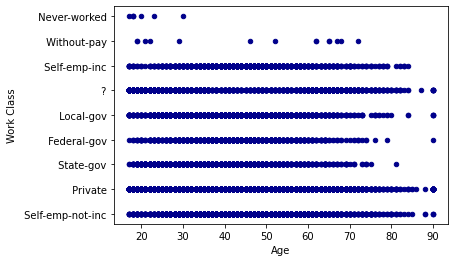

In [9]:
df.plot(kind='scatter', x='Age', y='Work Class', c='DarkBlue')

Lets have a look at their working class and the hours they work per week:

<AxesSubplot:xlabel='Hours/Week', ylabel='Work Class'>

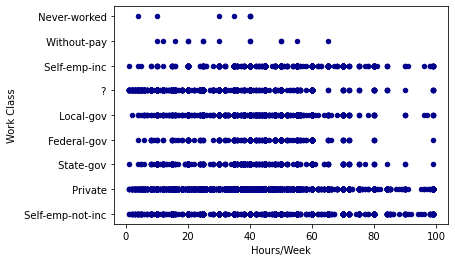

In [10]:
df.plot(kind='scatter', x='Hours/Week', y='Work Class', c='DarkBlue')

Lets have a look at their occupation and the hours they work per week:

<AxesSubplot:xlabel='Hours/Week', ylabel='Occupation'>

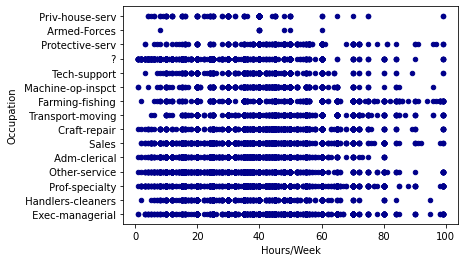

In [11]:
df.plot(kind='scatter', x='Hours/Week', y='Occupation', c='DarkBlue')

Lets see Scatterplots with all of our different variables


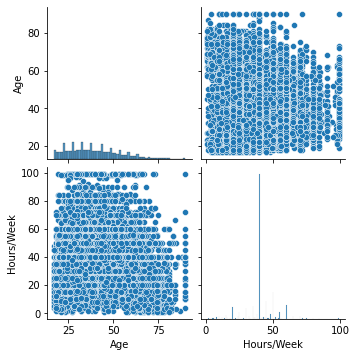

In [12]:
sns.pairplot(data= df.select_dtypes(include='number'))

Explanation: This is supposed to show the relationship of each value with each other value. The x axis shows the number values and compares them with the y axis values that are non-number values. I guess this shows that there is not much relationships between the other variables in the dataset.

### Comparing variation of age based on hours/week:

C:\Users\Amrita\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Amrita\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Amrita\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


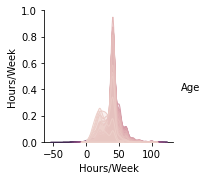

In [13]:
sns.pairplot(data= df.select_dtypes(include='number'), hue='Age')

# These few graphs above I am going to leave here for now in my EDA to maybe come back and fix later with better code if I get any ideas! But as you go further down, you will see more description under the graphs and in the analysis portion

### Boxplot:

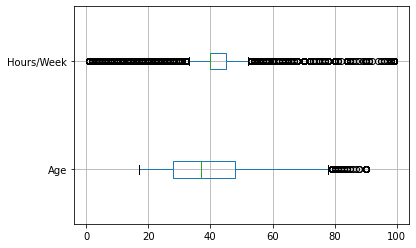

In [14]:
boxplot = df.boxplot(vert=False,fontsize=10)

#### To just look at one variable by itself we can use a histogram, this one helps us to see the differences in Age:


<AxesSubplot:ylabel='Frequency'>

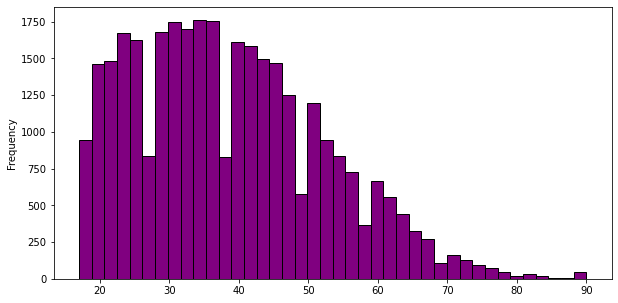

In [15]:
df['Age'].plot(kind='hist', bins=40, figsize=(10, 5), facecolor='purple',edgecolor='black')

We can see that there are more people in this dataset from range 20-45

#### We can do the same thing as above for Hours/Week

<AxesSubplot:ylabel='Frequency'>

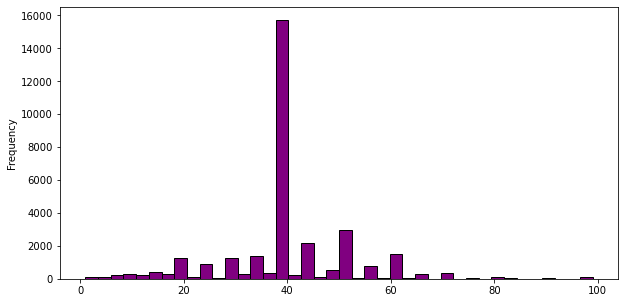

In [16]:
df['Hours/Week'].plot(kind='hist', bins=40, figsize=(10, 5), facecolor='purple',edgecolor='black')

We see that the majority average of hours/week is close to 40 hours/week

### Lets group our data: Lets see the relationships between occupation and age or hours/week. We will consider the averages for each occupation

In [17]:
occupation = (df.groupby('Occupation')['Age', 'Hours/Week'] .mean() .reset_index())

<ipython-input-17-5a8754a20b44>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  occupation = (df.groupby('Occupation')['Age', 'Hours/Week'] .mean() .reset_index())


In [18]:
occupation

,Occupation,Age,Hours/Week
0,?,40.882800,31.906131
1,Adm-clerical,36.963916,37.557708
2,Armed-Forces,30.222222,40.666667
3,Craft-repair,39.031471,42.304221
4,Exec-managerial,42.169208,44.987703
5,Farming-fishing,41.211268,46.989940
6,Handlers-cleaners,32.165693,37.947445
7,Machine-op-inspct,37.715285,40.755744
8,Other-service,34.949621,34.701669
9,Priv-house-serv,41.724832,32.885906


So this shows us the averages ages for each Occupation and the average hours worked per week for each Occupation.

#### Lets visualize the relationship between Age and Occupation:

<AxesSubplot:xlabel='Age', ylabel='Occupation'>

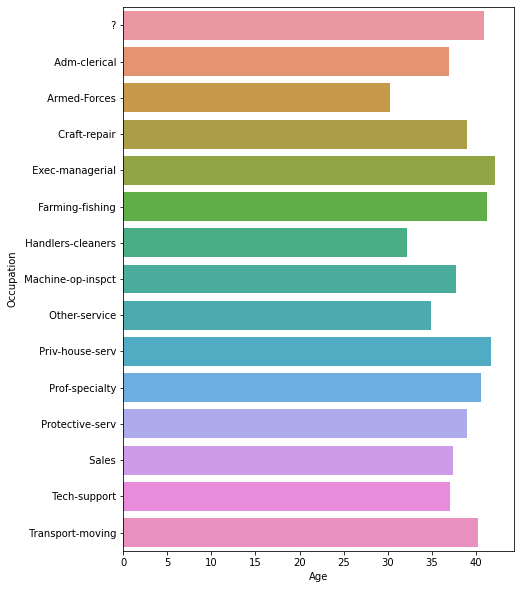

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(7,10)
sns.barplot(data= occupation, x= 'Age', y='Occupation')

Each job has a individuals working of many different age groups.

#### Lets view the variation of Age just throughout the whole dataset:

<AxesSubplot:xlabel='Age', ylabel='count'>

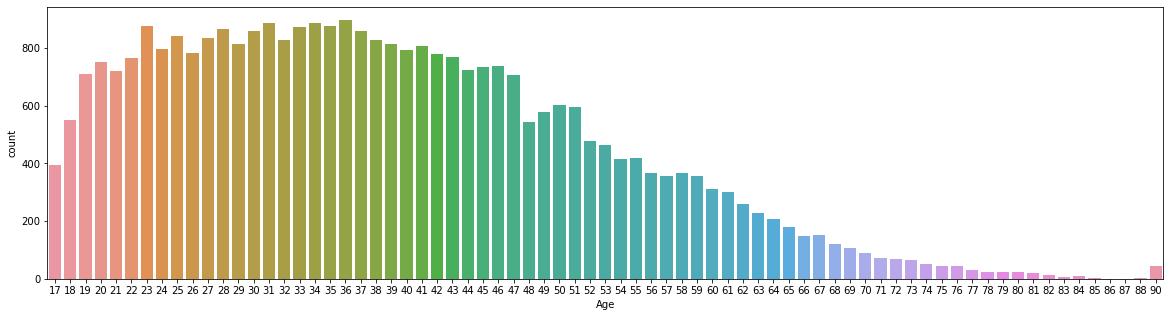

In [20]:
fig, ax= plt.subplots()
fig.set_size_inches(20,5)
sns.countplot(data=df, x='Age')

#plt.xticks(rotation= 45)

Wow! There is even a 90 years old individual working. We can see that the starting age is 17 all the way to 90, but vast majority of working group age is from 18- 47. 

##### Now, lets view the variation of hours worked per week throughout the whole dataset

<AxesSubplot:xlabel='Hours/Week', ylabel='count'>

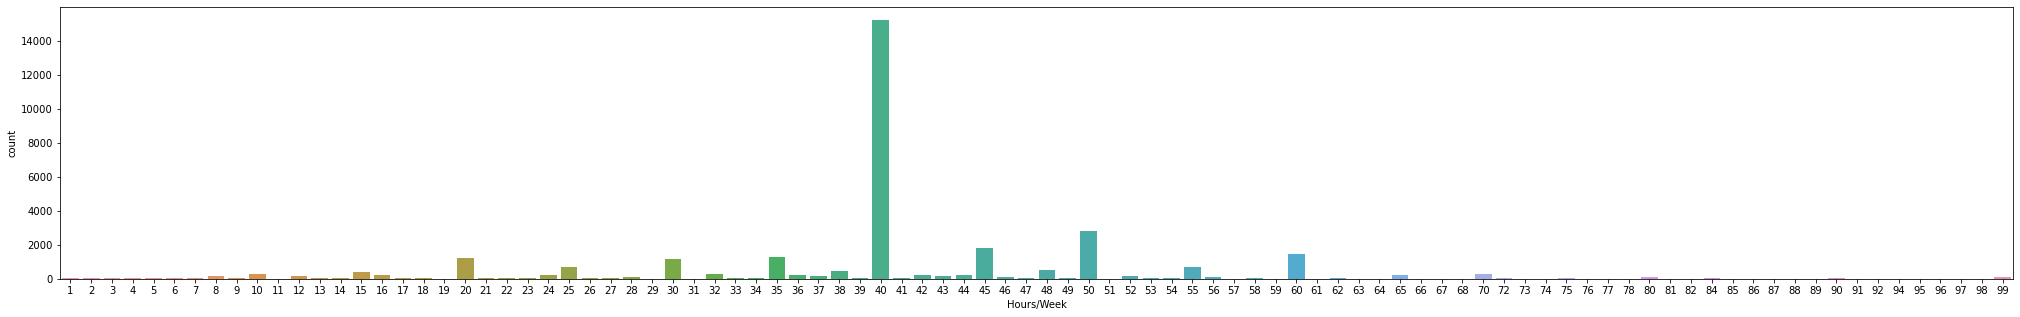

In [21]:
fig, ax= plt.subplots()
fig.set_size_inches(35,5)
sns.countplot(data=df, x='Hours/Week')

This again tells me that majority of the individuals in our datasett work around 40 hours/week. I am shocked to see that there is a pink point which tells us that someone worked 99 hours per week!

#### Now I would like to try to better compare hours worked/week with Work Class. I believe that people working privately or in their own bussiness would work more hours.

<AxesSubplot:xlabel='Work Class', ylabel='Hours/Week'>

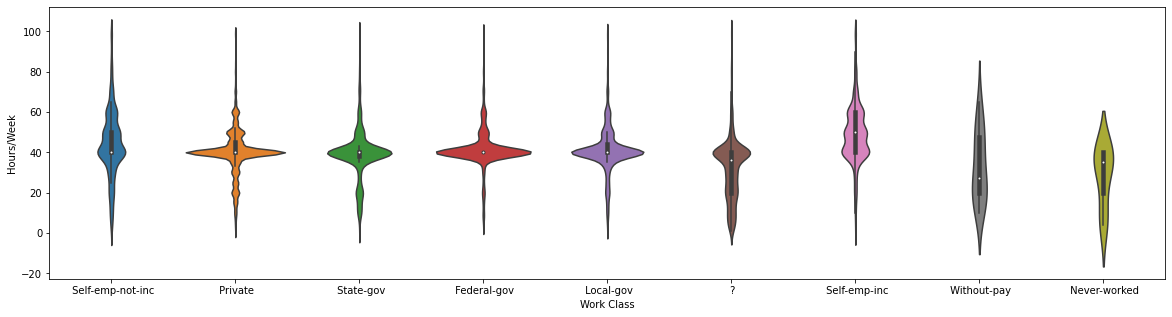

In [22]:
fig, ax= plt.subplots()
fig.set_size_inches(20,5)
sns.violinplot(data=df, x='Work Class', y='Hours/Week')

I see that throughout all Working classes, average is still at 40 hours/week. However, we see that both self employed options do work more than 40 hours/week more than other working classes. 
But also, the hours/week are very distributed and vast throughout all working classes.

# Lets group data based on Working Class

In [23]:
workingclass = (df.groupby('Work Class')['Age', 'Hours/Week'] .mean() .reset_index())

<ipython-input-23-9648458acf26>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  workingclass = (df.groupby('Work Class')['Age', 'Hours/Week'] .mean() .reset_index())


In [24]:
workingclass

,Work Class,Age,Hours/Week
0,?,40.960240,31.919390
1,Federal-gov,42.590625,41.379167
2,Local-gov,41.751075,40.982800
3,Never-worked,20.571429,28.428571
4,Private,36.797585,40.267096
5,Self-emp-inc,46.017025,48.818100
6,Self-emp-not-inc,44.969697,44.421881
7,State-gov,39.436392,39.030840
8,Without-pay,47.785714,32.714286


Older people, around the age of 47 are working 32 hours per week without pay! Hmm, interesting

# Lets group data based on Gender

In [25]:
gender = (df.groupby('Sex')['Age', 'Hours/Week'] .mean() .reset_index())

<ipython-input-25-3fc6ac9a4315>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gender = (df.groupby('Sex')['Age', 'Hours/Week'] .mean() .reset_index())


In [26]:
gender

,Sex,Age,Hours/Week
0,Female,36.858230,36.410361
1,Male,39.433567,42.428198


Based on this, we can conclude that men worked more than women. However, another question arises, does age play a factor? Because, while men do work more, the average age for men in this dateset is higher than the average age for women. However, the difference in age isnt too drastic. 


## Lets group data based on Education Level:

In [27]:
education = (df.groupby('Education')['Age', 'Hours/Week'] .mean() .reset_index())

<ipython-input-27-6827b8fea82b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  education = (df.groupby('Education')['Age', 'Hours/Week'] .mean() .reset_index())


In [28]:
education

,Education,Age,Hours/Week
0,10th,37.429796,37.052519
1,11th,32.355745,33.925957
2,12th,32.000000,35.780600
3,1st-4th,46.142857,38.255952
4,5th-6th,42.885886,38.897898
5,7th-8th,48.445820,39.366873
6,9th,41.060311,38.044747
7,Assoc-acdm,37.381443,40.504217
8,Assoc-voc,38.553546,41.610709
9,Bachelors,38.904931,42.614494


### Now lets visualize and compare between working class and education:

<AxesSubplot:xlabel='Age', ylabel='Work Class'>

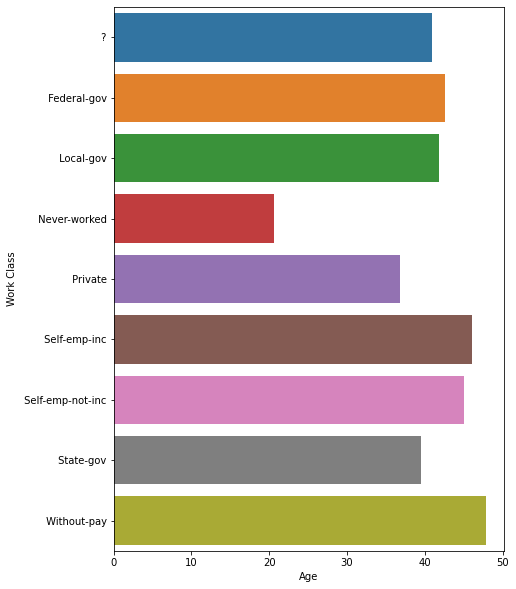

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(7,10)
sns.barplot(data= workingclass, x= 'Age', y='Work Class')

Variety of age groups for each working class. Individuals who have never worked are youngest, I am assuming after that age, they just have to work. 

<AxesSubplot:xlabel='Age', ylabel='Education'>

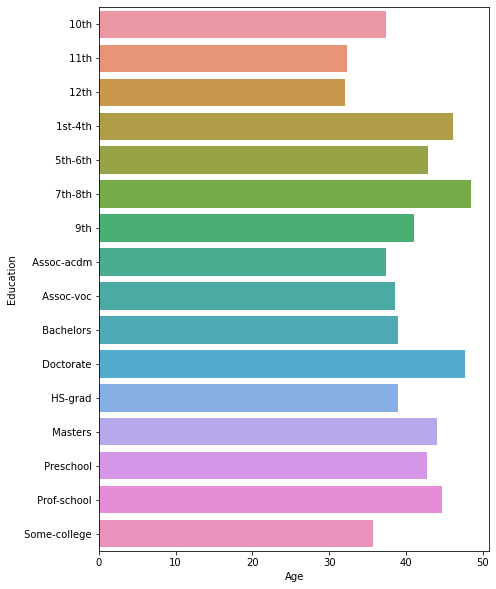

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(7,10)
sns.barplot(data= education, x= 'Age', y='Education')

Variety of age levels fro each education level. Mostly from around 32- 48

This comparison is very broad and doesnt really lead to me to any answers of my questions

### Lets compare Salary with Age & hours/week:

<AxesSubplot:xlabel='Age', ylabel='Salary'>

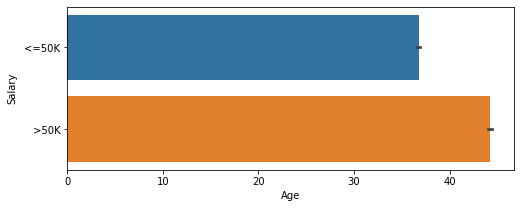

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(8,3)
sns.barplot(data= df, x= 'Age', y='Salary')

<AxesSubplot:xlabel='Hours/Week', ylabel='Salary'>

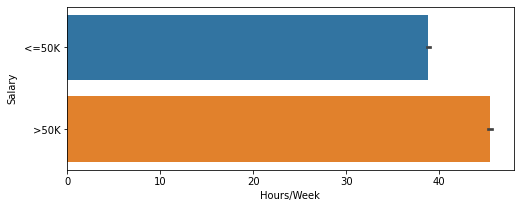

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(8,3)
sns.barplot(data= df, x= 'Hours/Week', y='Salary')

In [33]:
salary = (df.groupby('Salary')['Age', 'Hours/Week'] .mean() .reset_index())

<ipython-input-33-5031d15185e1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  salary = (df.groupby('Salary')['Age', 'Hours/Week'] .mean() .reset_index())


In [34]:
salary

,Salary,Age,Hours/Week
0,<=50K,36.783648,38.840163
1,>50K,44.249841,45.473026


In conclusion to the previous two graphs and this average here, older indviduals earn more and individuals who work more hours earn more. So to increase your salary over 50k/year, you must work more hours based on this dataset. 

# Analysis

#### Based on this dataset, and based on our EDA: 
####        - The older you are the more hours you work.
####        - Age and hours worked vary greatly in this dataset.
####        - This dataset consists of more people in the range 20-45
####        - The majority average of hours/week individuals in this datset work is 40 hours/week
####        - The average hours worked per week for each Occupation is in the range of 30-40 hours/week
####        - The average ages for each Occupation is within 30-41 years of age
####        - Throughout all Working classes, average hours worked is around 40 hours/week. However, we see that both self    employed options do work more than 40 hours/week more than other working classes. 
####        - This dataset shows that men worked more than women
####        - This dataset shows that older individuals make more.


# Answering Research Questions: 

### Question 1)  What is the correlation between the Working class of individuals in this dataset, and the hours they work per week? 

#### Through our analysis, we can see that throughout all Working classes, average hours worked is around 40 hours/week. However, we see that both self employed options do work more than 40 hours/week more than other working classes. This can be do to many factors, they can be working more due to more motivation, they are more driven. They may be working more because they realize that if they work more, their income will be significantly higher. It was shocking to see that some individuals do work up to 99 hours per week!

### Question 2) Lets compare Gender with hours/week. We will also consider the age level for more accurate comparisons.

#### Through looking at selected data for comparison from our EDA, we can conclude that men in this dataset worked more than women. However, the average age for men in this dateset is higher than the average age for women. 

### Question 3) What is the correlation between Salary and Age Level & Hours worked/Week?

#### Based on this dataset, we can say that individuals who worked more hours, with the average of 45 hours per week, earned more. Also, older individuals, with the average age of 44 earned over 50k/year. Individuals averaged age of 36 and working around 38 hours per week earned less than 50k/year.

# Conclusion

#### Through this Exploratory Data Analysis that I conducted, and after exploring many factors from this dataset I can conclude that the average most individuals work is 40 hours/week, the more hours you work, the greater your salary. 